# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_selection
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import balanced_accuracy_1interval_score

import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the tuning of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/adding_data.csv")

mid_rc = df.groupby("raceYear")["raceRound"].max().to_numpy() // 2
get_half = lambda x: f'{x["raceYear"]}{x["raceRound"] <= mid_rc[x["raceYear"] - 2006]}'
instances_per_half = df.apply(get_half, axis=1).value_counts(sort=False).to_numpy()

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

X = pd.read_csv("../assets/data/processed/adding_data_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


PI: 0.311 with (1, 6, 18, 26, 28, 38, 41, 44, 45, 49, 55) == ('constructorNationality',
	'constructorWins', 'driverAgeStarted', 'driverPodiums', 'driverPos15', 'driverPos4',
	'driverPos5', 'driverPos9', 'positionGrid', 'weatherCold', 'weatherWet')
SFS: 0.329 with (0, 1, 4, 6, 17, 18, 26, 30, 43, 44, 46, 47, 62) == ('carNumber',
	'positionGrid', 'driverNationality', 'constructorNationality', 'driverWins',
	'constructorWins', 'weatherCold', 'circuitType', 'driverPos3', 'driverPos4',
	'driverPos6', 'driverPos7', 'driverPac')
GA: 0.298 with (1, 6, 8, 12, 14, 15, 18, 20, 22, 27, 28, 29, 30, 32, 37, 38, 41, 45, 47,
	48, 49, 52, 59, 60, 62) == ('positionGrid', 'constructorNationality', 'raceRound',
	'circuitLocation', 'circuitLat', 'circuitLng', 'constructorWins', 'q2',
	'driverAgeToday', 'weatherDry', 'weatherWet', 'weatherCloudy', 'circuitType',
	'circuitLength', 'qAvg', 'driverAgeStarted', 'driverPodiums', 'driverPos5',
	'driverPos7', 'driverPos8', 'driverPos9', 'driverPos12', 'driverExp',

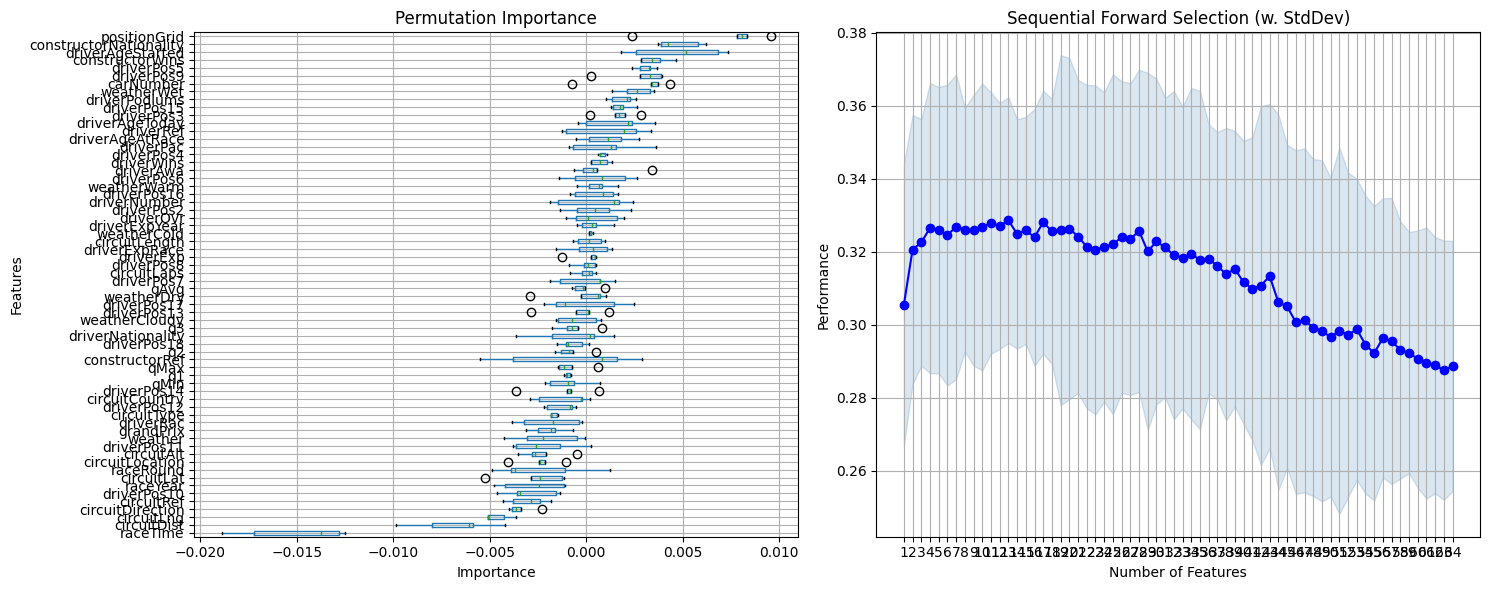

In [3]:
knn = KNeighborsClassifier(n_neighbors=15, metric="manhattan", weights="uniform")
scoring = make_scorer(balanced_accuracy_1interval_score)
model_selection(knn, X, y, tscv, scoring)

## Decision Tree


PI: 0.342 with (1, 18, 41) == ('constructorWins', 'driverPodiums', 'positionGrid')
SFS: 0.357 with (1, 4, 6, 9, 10, 11, 14, 16, 17, 18, 25, 26, 27, 28, 31, 32, 33, 34, 39,
	43, 46, 50, 51, 53, 54, 55, 57, 58, 60) == ('positionGrid', 'driverNationality',
	'constructorNationality', 'grandPrix', 'raceTime', 'circuitRef', 'circuitLat',
	'circuitAlt', 'driverWins', 'constructorWins', 'weatherWarm', 'weatherCold',
	'weatherDry', 'weatherWet', 'circuitDirection', 'circuitLength', 'circuitLaps',
	'circuitDist', 'driverExpYear', 'driverPos3', 'driverPos6', 'driverPos10',
	'driverPos11', 'driverPos13', 'driverPos14', 'driverPos15', 'driverPos17',
	'driverPos18', 'driverRac')
GA: 0.344 with (0, 1, 2, 4, 5, 7, 9, 10, 11, 14, 15, 16, 18, 22, 23, 26, 31, 32, 35, 36,
	37, 41, 45, 46, 47, 49, 50, 54, 56, 58, 59, 60, 61) == ('carNumber', 'positionGrid',
	'driverRef', 'driverNationality', 'constructorRef', 'raceYear', 'grandPrix',
	'raceTime', 'circuitRef', 'circuitLat', 'circuitLng', 'circuitAlt', 'con

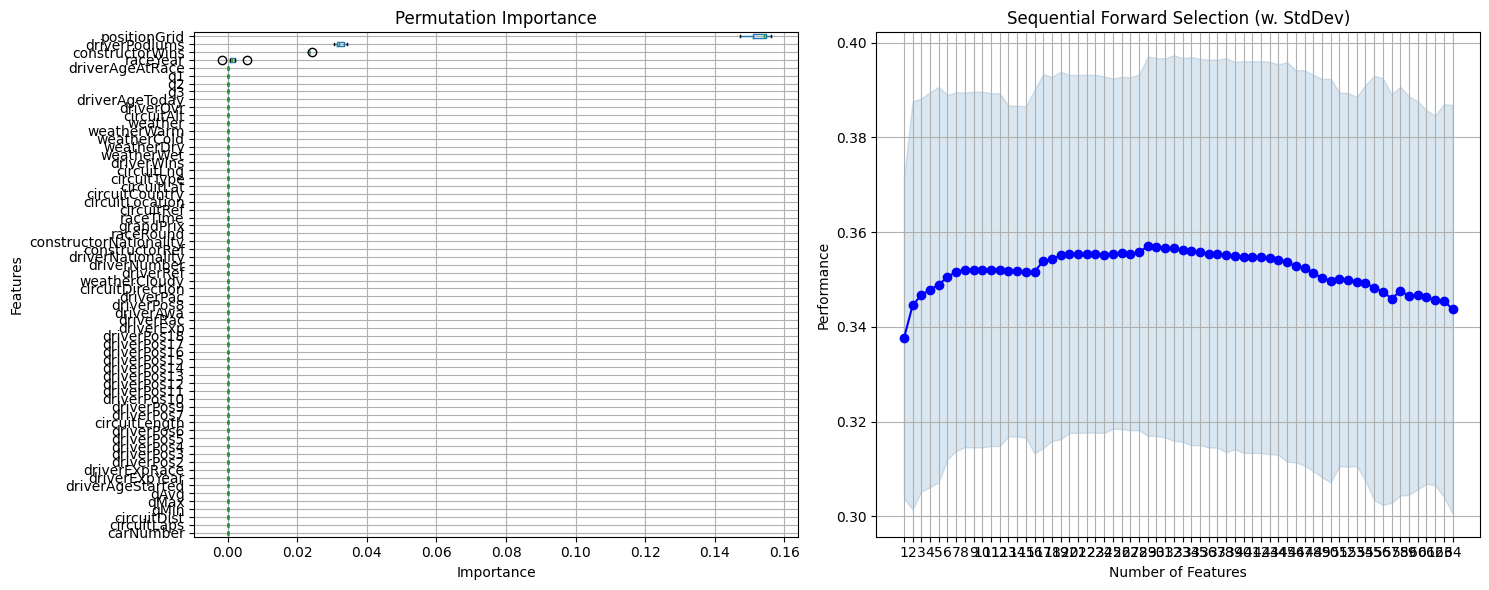

In [4]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=4, splitter="best")
scoring = make_scorer(balanced_accuracy_1interval_score)
model_selection(tree, X, y, tscv, scoring)

## Random Forest


PI: 0.354 with (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
	21, 22, 24, 25, 27, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
	51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63) == ('carNumber', 'circuitAlt',
	'circuitCountry', 'circuitDist', 'circuitLat', 'circuitLng', 'circuitLocation',
	'circuitRef', 'constructorNationality', 'constructorRef', 'constructorWins',
	'driverAgeStarted', 'driverAgeToday', 'driverAwa', 'driverExp', 'driverExpRace',
	'driverExpYear', 'driverNationality', 'driverNumber', 'driverOvr', 'driverPac',
	'driverPodiums', 'driverPos10', 'driverPos11', 'driverPos12', 'driverPos13',
	'driverPos14', 'driverPos15', 'driverPos16', 'driverPos18', 'driverPos2', 'driverPos3',
	'driverPos4', 'driverPos5', 'driverPos6', 'driverPos7', 'driverPos8', 'driverPos9',
	'driverRac', 'driverRef', 'driverWins', 'grandPrix', 'positionGrid', 'q1', 'q2', 'q3',
	'qAvg', 'qMax', 'qMin', 'raceRound', 'raceYear', 'weather', 'weatherDry',
	'weathe

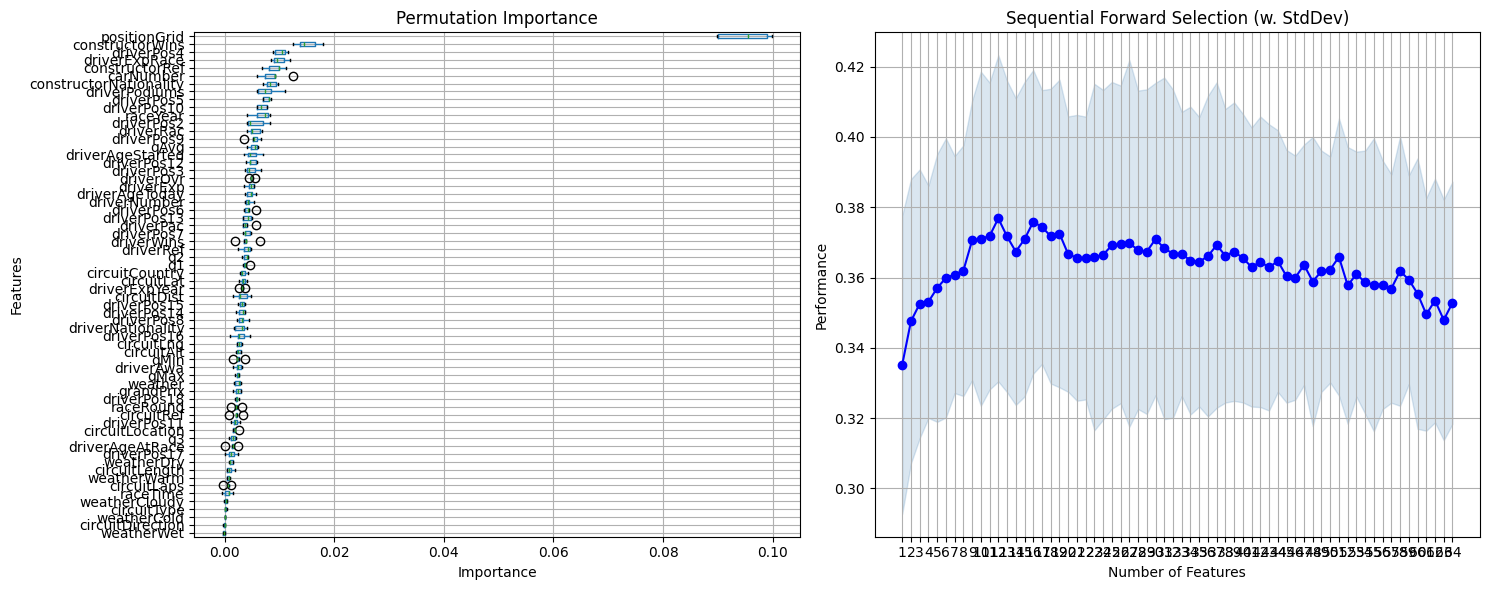

In [5]:
random_forest = RandomForestClassifier(
    criterion="log_loss", max_depth=6, n_estimators=200
)

scoring = make_scorer(balanced_accuracy_1interval_score)

model_selection(random_forest, X, y, tscv, scoring)

## Multilayer Perceptron


PI: 0.361 with (0, 1, 2, 4, 5, 6, 7, 8, 10, 14, 15, 17, 18, 21, 22, 25, 28, 30, 32, 34,
	36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 60,
	61) == ('carNumber', 'circuitDist', 'circuitLat', 'circuitLength', 'circuitLng',
	'circuitType', 'constructorNationality', 'constructorRef', 'constructorWins',
	'driverAgeStarted', 'driverAgeToday', 'driverAwa', 'driverExpRace', 'driverExpYear',
	'driverNationality', 'driverPodiums', 'driverPos10', 'driverPos11', 'driverPos12',
	'driverPos13', 'driverPos14', 'driverPos15', 'driverPos17', 'driverPos2', 'driverPos3',
	'driverPos4', 'driverPos5', 'driverPos6', 'driverPos7', 'driverPos8', 'driverPos9',
	'driverRac', 'driverRef', 'driverWins', 'positionGrid', 'q3', 'qAvg', 'qMax',
	'raceRound', 'raceTime', 'raceYear', 'weatherWarm', 'weatherWet')
SFS: 0.376 with (1, 8, 9, 11, 16, 17, 21, 22, 24, 29, 31, 41, 43, 44, 45, 46, 47, 50,
	51, 53, 56, 60) == ('positionGrid', 'raceRound', 'grandPrix', 'circuitRef',
	'circuit

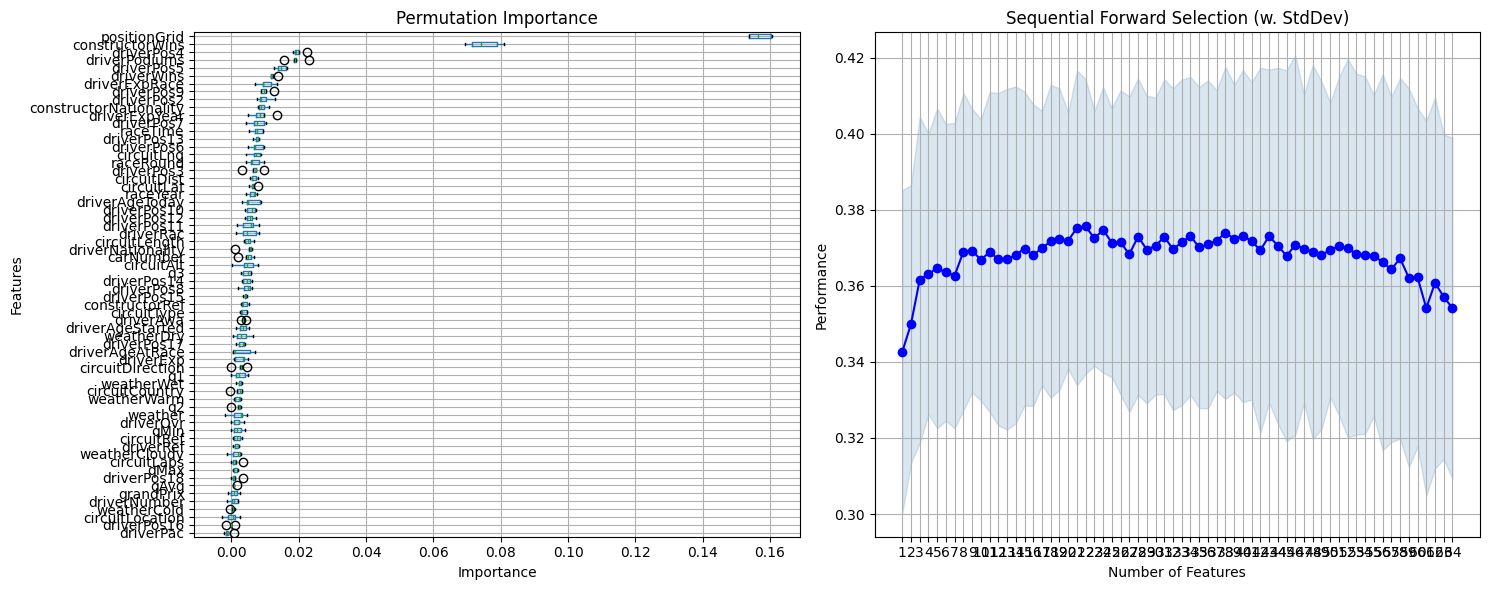

In [6]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(50, 25))
scoring = make_scorer(balanced_accuracy_1interval_score)
model_selection(nn, X, y, tscv, scoring)

## Results


Therefore, the selection for each algorithm are as follows

- KNeighborsClassifier: 0.329 with ('carNumber', 'positionGrid', 'driverNationality', 'constructorNationality', 'driverWins', 'constructorWins', 'weatherCold', 'circuitType', 'driverPos3', 'driverPos4', 'driverPos6', 'driverPos7', 'driverPac')
- DecisionTreeClassifier: 0.357 with ('positionGrid', 'driverNationality', 'constructorNationality', 'grandPrix', 'raceTime', 'circuitRef', 'circuitLat', 'circuitAlt', 'driverWins', 'constructorWins', 'weatherWarm', 'weatherCold', 'weatherDry', 'weatherWet', 'circuitDirection', 'circuitLength', 'circuitLaps', 'circuitDist', 'driverExpYear', 'driverPos3', 'driverPos6', 'driverPos10', 'driverPos11', 'driverPos13', 'driverPos14', 'driverPos15', 'driverPos17', 'driverPos18', 'driverRac')
- RandomForestClassifier: 0.377 with ('carNumber', 'positionGrid', 'driverRef', 'constructorRef', 'circuitLat', 'driverWins', 'constructorWins', 'weatherWet', 'circuitDirection', 'driverPos3', 'driverPos10', 'driverPos12')
- MLPClassifier: 0.376 with ('positionGrid', 'raceRound', 'grandPrix', 'circuitRef', 'circuitAlt', 'driverWins', 'q3', 'driverAgeToday', 'weather', 'weatherCloudy', 'circuitDirection', 'driverPodiums', 'driverPos3', 'driverPos4', 'driverPos5', 'driverPos6', 'driverPos7', 'driverPos10', 'driverPos11', 'driverPos13', 'driverPos16', 'driverRac')
